In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#importing numpy and matplotlib.pyplot

In [2]:
#file=open('Test_image.txt')
#rows=file.read().split()
#for i_counter in range(0,len(rows)):
#    rows[i_counter]=rows[i_counter].split(',')
#arr_image_0=np.array(rows,dtype=int)    
#arr_image_0
#importing the given image in an array form from the appropriate file
#print(arr_image_0)
arr_image_0=np.genfromtxt('testcase2.csv', delimiter=',',dtype='int')
print(arr_image_0)

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [3]:
print(arr_image_0)
shape=arr_image_0.shape
size=arr_image_0.size
#obtaining dimensions of imported array
arr_identities=np.zeros(500,dtype='int')
arr_x_coords=np.zeros(500,dtype='int')
arr_y_coords=np.zeros(500,dtype='int')
arr_num_pixels=np.zeros(500,dtype='int')
arr_intensity=np.zeros(500,dtype='int')
arr_intersecting_identities_1=np.zeros(500,dtype='int')
#List of blocks of pixels which intersect another identities(List of the smaller identities of redundant pairs)
arr_intersecting_identities_2=np.zeros(500,dtype='int')
#List of blocks of pixels which intersect another identities(List of the larger identities of redundant pairs)
arr_final_correction=np.zeros(500,dtype='int')
#Final list of identities paired up with a particular one (redundancies)
#initiating required arrays
print(arr_x_coords)
arr_stars=np.zeros((100,15),dtype='int')
#2-D array maintained for eliminating clashings between stars

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [4]:
num_rows=shape[0]
padding_vertical=np.zeros(num_rows,dtype=int)
#creating a column of zeroes (1 dimensional)
arr_image_1=np.insert(arr_image_0,0,padding_vertical,axis=1)
#Adding the left column of padding of zeros to the image array
print(arr_image_1)
vertical_padding_resized=padding_vertical.reshape(-1,1)
#resizing the 1-dimensional column to a 2-dimensional array with one column for requirements by numpy.append
arr_image_2=np.append(arr_image_1,vertical_padding_resized,axis=1)
#adding the right column of padding of zeros to the image array
print(arr_image_2)
print(arr_x_coords)

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0

In [5]:
shape2=arr_image_2.shape
#obtaining dimensions of the image with added padding columns
num_columns=shape2[1]
padding_horizontal=np.zeros(num_columns,dtype=int)
#creating a row of zeros(1-dimensional)
arr_image_3=np.insert(arr_image_2,0,padding_horizontal,axis=0)
print(arr_image_3)
#Adding the top row of padding of zeros to the image array
horizontal_padding_resized=padding_horizontal.reshape(1,-1)
#resizingthe 1-dimensional row to a 2-dimensional array with one row for requirements by numpy.append
arr_image=np.append(arr_image_3,horizontal_padding_resized,axis=0)
#Adding the bottom row of padding to the image array
arr_image
shape3=arr_image_3.shape
size_new=arr_image.size
num_rows_f=shape3[0]
num_cols_f=shape3[1]
print(arr_image)
print(arr_x_coords)
print(size_new)

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0

[1 1 1 ... 0 0 0]
[ 1 13 14 ...  0  0  0]


<ipython-input-25-ebd35f7520d6>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


Text(0.5, 1.0, 'Stars')

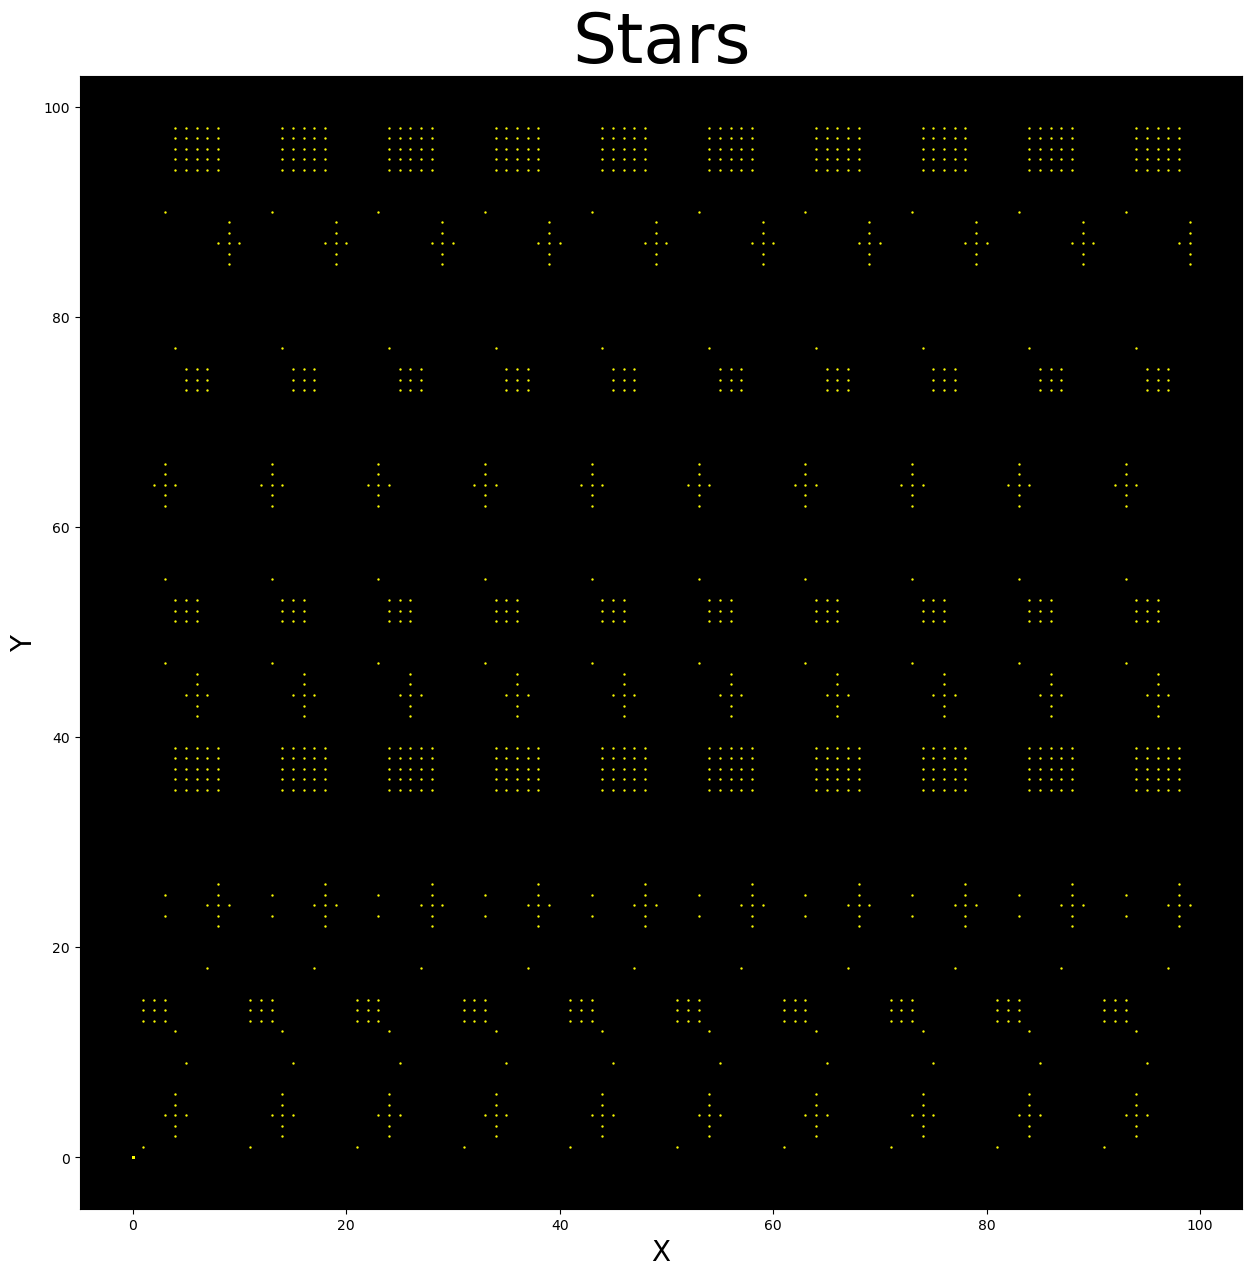

In [25]:
#The following segment is to plot out the original image 
row_go=0
# row_go will be used to travel across arr_image vertically
col_go=0
# col_go will be used to travel across arr_image horizontally
scatter_before_col=np.zeros(size_new,dtype='int')
#This array will maintain the x coordinates of pixels with non-zero identities
sbci=0
# sbci will help travel through scatter_before_col
scatter_before_row=np.zeros(size_new,dtype='int')
#This array will maintain the y coordinates of pixels with non-zero identities
sbri=0
# sbri will help travel through scatter_before_row

#The following while loop is to travel through arr_image
while(row_go<shape[0]):
    col_go=0
    #resetting column number to 0 at the start of travelling through each row
    
    #The following while loop is to travel across a row of arr_image
    while(col_go<shape[1]):
        #The following condition is for separating the cases where the pixels have 0 intensity
        if(arr_image[row_go][col_go]!=0):
            scatter_before_col[sbci]=row_go
            scatter_before_row[sbri]=col_go
            #Setting the appropriate coordinate values in respective arrays when pixels have non-zero intensity
            sbci+=1
            sbri+=1
            #incrementing counting variables sbri and sbci
        col_go+=1
        #incrementing col_go to go to the next element in the row
    row_go+=1
    #incrementing row_go to go to the next row
print(scatter_before_col)
print(scatter_before_row)

plt.figure(figsize=(15,15),dpi=100)
plot=plt.scatter(scatter_before_col,scatter_before_row,s=0.5,color="yellow")
plt.savefig('pic.png')
ax=plt.axes()
ax.set_facecolor("black")
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Stars",fontsize=50)
#plotting the original image

In [7]:
count=0
#'count' will keep a track of the identities of groups of pixels
x_travel=0
#'x_travel' will be the current row number in the matrix while travelling
y_travel=0
#'y_travel' will be the current column number in the matrix while travelling
clashing_travel=0
#'clashing_travel' will keep a track of clashings in the blocks
#The following while loop will be for travelling across the matrix in a zig-zag pattern
while (1):
    #The following condition is separates the cases when current element is zero and non-zero
    if arr_image[x_travel][y_travel] !=0:
        #If x_travel is even, we have to move to the left of the current element
        if x_travel %2 ==0:
            #Here, the previous element travelled from is that having the coordinates x_travel, y_travel +1
            #The following condition separates the cases when the previous element is zero and non-zero
            if arr_image[x_travel][y_travel+1] ==0:
                #The following condition separates the cases when the element above current element is zero and non-zero
                if arr_image[x_travel-1][y_travel]==0:
                    arr_x_coords[count]+=(x_travel)*(arr_image[x_travel][y_travel])
                    arr_y_coords[count]+=(y_travel)*(arr_image[x_travel][y_travel])
                    arr_num_pixels[count]+=1
                    arr_intensity[count]+=arr_image[x_travel][y_travel]
                    #The above lines add corresponding information of the element to the respective arrays
                    arr_identities[count]=count+1
                    #As here, both the previous element and the element above are zero, we found a new identity.
                    #Hence, the above line adds a new identity to the identities' array
                    arr_image[x_travel][y_travel]=(count+1)
                    #This line changes the current element's value to its identity
                    count+=1
                    #As we found a new identity, we increase the count by 1.
                else:
                    arr_x_coords[(arr_image[x_travel-1][y_travel])-1]+=(x_travel)*(arr_image[x_travel][y_travel])
                    arr_y_coords[(arr_image[x_travel-1][y_travel])-1]+=(y_travel)*(arr_image[x_travel][y_travel])
                    arr_num_pixels[(arr_image[x_travel-1][y_travel])-1]+=1
                    arr_intensity[(arr_image[x_travel-1][y_travel])-1]+=arr_image[x_travel][y_travel]
                    #The above lines add corresponding information of the element to the respective arrays
                    arr_image[x_travel][y_travel]=arr_image[x_travel-1][y_travel]
                    #As the element above the current isn't zero, the current element takes its value.
            else:
                if arr_image[x_travel-1][y_travel] == 0 or arr_image[x_travel-1][y_travel] == arr_image[x_travel][y_travel+1]:
                    arr_x_coords[(arr_image[x_travel][y_travel+1])-1]+=(x_travel)*(arr_image[x_travel][y_travel])
                    arr_y_coords[(arr_image[x_travel][y_travel+1])-1]+=(y_travel)*(arr_image[x_travel][y_travel])
                    arr_num_pixels[(arr_image[x_travel][y_travel+1])-1]+=1
                    arr_intensity[(arr_image[x_travel][y_travel+1])-1]+=arr_image[x_travel][y_travel]
                    #The above lines add corresponding information of the element to the respective arrays
                    arr_image[x_travel][y_travel]=arr_image[x_travel][y_travel+1]
                    #As the previous element is non-zero, the current element takes its value.
                else:
                    #Here since both the previous element and the one above are non-zero, there is a redundant block.
                    #i.e. two blocks intersect. The above line gives the current element the minimum of the two values
                    arr_x_coords[(min(arr_image[x_travel-1][y_travel],arr_image[x_travel][y_travel+1]))-1]+=(x_travel)*(arr_image[x_travel][y_travel])
                    arr_y_coords[(min(arr_image[x_travel-1][y_travel],arr_image[x_travel][y_travel+1]))-1]+=(y_travel)*(arr_image[x_travel][y_travel])
                    arr_num_pixels[min(arr_image[x_travel-1][y_travel],arr_image[x_travel][y_travel+1])-1]+=1
                    arr_intensity[(min(arr_image[x_travel-1][y_travel],arr_image[x_travel][y_travel+1]))-1]+=arr_image[x_travel][y_travel]
                    arr_image[x_travel][y_travel]=min(arr_image[x_travel-1][y_travel],arr_image[x_travel][y_travel+1])
                    arr_intersecting_identities_1[clashing_travel]=min(arr_image[x_travel-1][y_travel],arr_image[x_travel][y_travel+1])
                    #This line adds the minimum of the two values to the first array of clashings, as the next element
                    arr_intersecting_identities_2[clashing_travel]=max(arr_image[x_travel-1][y_travel],arr_image[x_travel][y_travel+1])
                    #This line adds the maximum of the two values to the second array of clashings, as the next element
                    clashing_travel+=1
                    #This line increases the clashing count by 1 as we spotted a new clashing.
        #If x_travel is odd, we have to move to the right of the current element            
        else:
            #Here, the previous element travelled from is that having the coordinates x_travel, y_travel -1
            #The following condition separates the cases when the previous element is zero and non-zero
            if arr_image[x_travel][y_travel-1] ==0:
                #The following condition separates the cases when the element above current element is zero and non-zero
                if arr_image[x_travel-1][y_travel]==0:
                    arr_x_coords[count]+=((x_travel)*(arr_image[x_travel][y_travel]))
                    arr_y_coords[count]+=((y_travel)*(arr_image[x_travel][y_travel]))
                    arr_num_pixels[count]+=1
                    arr_intensity[count]+=(arr_image[x_travel][y_travel])
                    #The above lines add corresponding information of the element to the respective arrays
                    arr_identities[count]=(count+1)
                    #As here, both the previous element and the element above are zero, we found a new identity.
                    #Hence, the above line adds a new identity to the identities' array
                    arr_image[x_travel][y_travel]=(count+1)
                    #This line changes the current element's value to its identity
                    count+=1
                    #As we found a new identity, we increase the count by 1.
                else:
                    arr_x_coords[(arr_image[x_travel-1][y_travel])-1]+=(x_travel)*(arr_image[x_travel][y_travel])
                    arr_y_coords[(arr_image[x_travel-1][y_travel])-1]+=(y_travel)*(arr_image[x_travel][y_travel])
                    arr_num_pixels[(arr_image[x_travel-1][y_travel])-1]+=1
                    arr_intensity[(arr_image[x_travel-1][y_travel])-1]+=arr_image[x_travel][y_travel]
                    #The above lines add corresponding information of the element to the respective arrays
                    arr_image[x_travel][y_travel]=arr_image[x_travel-1][y_travel]
                    #As the element above the current isn't zero, the current element takes its value.
            else:
                if arr_image[x_travel-1][y_travel] == 0 or arr_image[x_travel-1][y_travel] == arr_image[x_travel][y_travel-1]:
                    arr_x_coords[(arr_image[x_travel][y_travel-1])-1]+=(x_travel)*(arr_image[x_travel][y_travel])
                    arr_y_coords[(arr_image[x_travel][y_travel-1])-1]+=(y_travel)*(arr_image[x_travel][y_travel])
                    arr_num_pixels[(arr_image[x_travel][y_travel-1])-1]+=1
                    arr_intensity[(arr_image[x_travel][y_travel-1])-1]+=arr_image[x_travel][y_travel]
                    #The above lines add corresponding information of the element to the respective arrays
                    arr_image[x_travel][y_travel]=arr_image[x_travel][y_travel-1]
                    #As the previous element is non-zero, the current element takes its value.
                else:
                    #Here since both the previous element and the one above are non-zero, there is a redundant block.
                    #i.e. two blocks intersect. The above line gives the current element the minimum of the two values
                    arr_x_coords[(min(arr_image[x_travel-1][y_travel],arr_image[x_travel][y_travel-1]))-1]+=(x_travel)*(arr_image[x_travel][y_travel])
                    arr_y_coords[(min(arr_image[x_travel-1][y_travel],arr_image[x_travel][y_travel-1]))-1]+=(y_travel)*(arr_image[x_travel][y_travel])
                    arr_num_pixels[(min(arr_image[x_travel-1][y_travel],arr_image[x_travel][y_travel-1]))-1]+=1
                    arr_intensity[(min(arr_image[x_travel-1][y_travel],arr_image[x_travel][y_travel-1]))-1]+=arr_image[x_travel][y_travel]
                    arr_image[x_travel][y_travel]=min(arr_image[x_travel-1][y_travel],arr_image[x_travel][y_travel-1])
                    arr_intersecting_identities_1[clashing_travel]=min(arr_image[x_travel-1][y_travel],arr_image[x_travel][y_travel-1])
                    #This line adds the minimum of the two values to the first array of clashings, as the next element
                    arr_intersecting_identities_2[clashing_travel]=max(arr_image[x_travel-1][y_travel],arr_image[x_travel][y_travel-1])
                    #This line adds the maximum of the two values to the second array of clashings, as the next element
                    clashing_travel+=1
                    #This line increases the clashing count by 1 as we spotted a new clashing.
    #The following conditions are for deciding the next element to be travelled to
    if x_travel %2==0:
        #If x_travel is even, we have to move to the left of the current element
        if x_travel==0 and y_travel==0:
            x_travel+=1
        elif y_travel==1:
            #But if we can't travel left anymore, we have to travel to the next row.
            if x_travel+1==num_rows_f:
                #But if there is no row next, the image has been traversed fully. Thus we exit the while loop
                break
            else:
                #If next row exists, increase the row number
                x_travel+=1
        else:
            #If we aren't at the extreme left , decrease the column number
            y_travel-=1
    else:
        #If x_travel is odd, we have to move to the right of the current element
        if y_travel+2==num_cols_f:
            #But if we can't travel right anymore, we have to travel to the next row.
            if x_travel+1==num_rows_f:
                #But if there is no row next, the image has been traversed fully. Thus we exit the while loop.
                break
            else:
                #If next row exists, we increase row number by 1.
                x_travel+=1
        else:
            #If we aren't at the extreme right, we increase the column number by 1.
            y_travel+=1
            

In [8]:
print(arr_image)

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [9]:
print(arr_x_coords)

[   1   18   15   20    3    3    3    3    6    3  150    4   45  150
    4    8    5   30   54   12    7   40   45   16   18   11  108   65
   70   13   13   13   13   26   13  400   14  135  400   14   28   15
   80  144   32   17   90   95   36   38   21  198  115  120   23   23
   23   23   46   23  650   24  225  650   24   48   25  130  234   52
   27  140  145   56   58   31  288  165  170   33   33   33   33   66
   33  900   34  315  900   34   68   35  180  324   72   37  190  195
   76   78   41  378  215  220   43   43   43   43   86   43 1150   44
  405 1150   44   88   45  230  414   92   47  240  245   96   98   51
  468  265  270   53   53   53   53  106   53 1400   54  495 1400   54
  108   55  280  504  112   57  290  295  116  118   61  558  315  320
   63   63   63   63  126   63 1650   64  585 1650   64  128   65  330
  594  132   67  340  345  136  138   71  648  365  370   73   73   73
   73  146   73 1900   74  675 1900   74  148   75  380  684  152   77
  390 

In [10]:
print(arr_identities)
final_num_identities=0
# final_num_identities measures final number of identities after taking care of clashings
while(arr_identities[final_num_identities]!=0):
    final_num_identities+=1
print(final_num_identities)   

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

In [11]:
print(arr_y_coords)

[   1  126  323   17   23   25   47   55  125   90 2400   77  468  925
   12   11    9  217  666   91   18  117  438   51  171    1  126  323
   17   23   25   47   55  125   90 2400   77  468  925   12   11    9
  217  666   91   18  117  438   51  171    1  126  323   17   23   25
   47   55  125   90 2400   77  468  925   12   11    9  217  666   91
   18  117  438   51  171    1  126  323   17   23   25   47   55  125
   90 2400   77  468  925   12   11    9  217  666   91   18  117  438
   51  171    1  126  323   17   23   25   47   55  125   90 2400   77
  468  925   12   11    9  217  666   91   18  117  438   51  171    1
  126  323   17   23   25   47   55  125   90 2400   77  468  925   12
   11    9  217  666   91   18  117  438   51  171    1  126  323   17
   23   25   47   55  125   90 2400   77  468  925   12   11    9  217
  666   91   18  117  438   51  171    1  126  323   17   23   25   47
   55  125   90 2400   77  468  925   12   11    9  217  666   91   18
  117 

In [12]:
print(arr_intensity)
print(arr_intersecting_identities_1)
print(arr_intersecting_identities_2)

[ 1  9  5  5  1  1  1  1  2  1 25  1  9 25  1  2  1  5  9  2  1  5  5  2
  2  1  9  5  5  1  1  1  1  2  1 25  1  9 25  1  2  1  5  9  2  1  5  5
  2  2  1  9  5  5  1  1  1  1  2  1 25  1  9 25  1  2  1  5  9  2  1  5
  5  2  2  1  9  5  5  1  1  1  1  2  1 25  1  9 25  1  2  1  5  9  2  1
  5  5  2  2  1  9  5  5  1  1  1  1  2  1 25  1  9 25  1  2  1  5  9  2
  1  5  5  2  2  1  9  5  5  1  1  1  1  2  1 25  1  9 25  1  2  1  5  9
  2  1  5  5  2  2  1  9  5  5  1  1  1  1  2  1 25  1  9 25  1  2  1  5
  9  2  1  5  5  2  2  1  9  5  5  1  1  1  1  2  1 25  1  9 25  1  2  1
  5  9  2  1  5  5  2  2  1  9  5  5  1  1  1  1  2  1 25  1  9 25  1  2
  1  5  9  2  1  5  5  2  2  1  9  5  5  1  1  1  1  2  1 25  1  9 25  1
  2  1  5  9  2  1  5  5  2  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [13]:
print(arr_num_pixels)
print(arr_final_correction)
print(clashing_travel)

[ 1  9  5  5  1  1  1  1  2  1 25  1  9 25  1  2  1  5  9  2  1  5  5  2
  2  1  9  5  5  1  1  1  1  2  1 25  1  9 25  1  2  1  5  9  2  1  5  5
  2  2  1  9  5  5  1  1  1  1  2  1 25  1  9 25  1  2  1  5  9  2  1  5
  5  2  2  1  9  5  5  1  1  1  1  2  1 25  1  9 25  1  2  1  5  9  2  1
  5  5  2  2  1  9  5  5  1  1  1  1  2  1 25  1  9 25  1  2  1  5  9  2
  1  5  5  2  2  1  9  5  5  1  1  1  1  2  1 25  1  9 25  1  2  1  5  9
  2  1  5  5  2  2  1  9  5  5  1  1  1  1  2  1 25  1  9 25  1  2  1  5
  9  2  1  5  5  2  2  1  9  5  5  1  1  1  1  2  1 25  1  9 25  1  2  1
  5  9  2  1  5  5  2  2  1  9  5  5  1  1  1  1  2  1 25  1  9 25  1  2
  1  5  9  2  1  5  5  2  2  1  9  5  5  1  1  1  1  2  1 25  1  9 25  1
  2  1  5  9  2  1  5  5  2  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [14]:
correction_travel=0
# correction_travel will be used to travel through arr_intersecting_identities
identity_count_1=0
#current row number of arr_stars
identity_count_2=0
#current column number of arr_stars
search=1
# search will act as an index while searching for identities already in a row, and finding clashings in the former two arrays
#corresponding to them

#The following loop is used to travel through arr_intersecting_identities_1 and eliminate clashings
while(correction_travel<arr_intersecting_identities_1.shape[0]):
    current = arr_intersecting_identities_1[correction_travel]
    # current is the current identity to be searched for
    
    #if current is -1, the element has been taken care of. If current is zero, it's not a new identity
    if(current!=-1 and current!=0):
        #if current is a valid identity, change current location in arr_stars to current
        arr_stars[identity_count_1][identity_count_2]=current
        identity_count_2+=1
        #increment column number by 1
        
    #The following loop is for searching clashings for current element and adding them all in the current row's elements    
    while(current!=0 and current!=-1):
        search1=np.array(np.where(arr_intersecting_identities_1==current))
        #The array search1 maintains the locations in arr_intersecting_identities_1 at which current is found
        search2=np.array(np.where(arr_intersecting_identities_2==current))
        #The array search2 maintains the locations in arr_intersecting_identities_2 at which current is found
        length1=search1.size
        length2=search2.size
        #length1 and length2 are sizes of search1 and search2 respectively
        search1=search1[0]
        search2=search2[0]
        #the above lines make search1 and search2 1-d Arrays instead of 2-D arrays with one row each
        
        #if any of search1 and search2 are empty, we should make the corresponding sizes 0.
        if (search1.size==0):
            length1=0
        if (search2.size==0):
            length2=0
                
        travel1=0
        travel2=0
        #travel1 will be used to travel through search1, travel2 through search2
        
        #The following loop is for travelling through search1
        while(travel1<length1):
            arr_stars[identity_count_1][identity_count_2]=arr_intersecting_identities_2[int(search1[travel1])]
            #At whichever position in arr_intersecting_identities_1 where we found current, we need to take the corresponding
            #identities from arr_intersecting_identities_2
            arr_intersecting_identities_1[search1[travel1]]=-1
            arr_intersecting_identities_2[search1[travel1]]=-1
            #changing already considered clashed identities to -1
            identity_count_2+=1
            travel1+=1
            #incrementing traversing variables
            
        #The following loop is for travelling through search2    
        while(travel2<length2):
            arr_stars[identity_count_1][identity_count_2]=arr_intersecting_identities_1[int(search2[travel2])]
            #At whichever position in arr_intersecting_identities_2 where we found current, we need to take the corresponding
            #identities from arr_intersecting_identities_1
            arr_intersecting_identities_1[search2[travel2]]=-1
            arr_intersecting_identities_2[search2[travel2]]=-1
            #changing already considered clashed identities to -1
            identity_count_2+=1
            travel2+=1
            #incrementing traversing variables
            
        current=arr_stars[identity_count_1][search]
        #changing current to next
        
        #The following loop helps break the loop if the next(and thus all next elements of current row of arr_stars) are 0
        if(current==0):
            identity_count_1+=1
            identity_count_2=0
            break
        search+=1
        #incrementing search by 1
        identity_count_1+=1
        #incrementing row number as all clashings of current star have been handled
        identity_count_2=0
        #resetting column number to 0
    correction_travel+=1
    #moving to the next position in arr_intersecting_identities_1
print(arr_stars)    
    
    

[[ 3  9  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 4 16  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [15]:
row=0
col=0
#row and col will be used to travel through arr_stars

#The following loop is to be used to go through arr_stars
while(arr_stars[row][0]!=0 or row==1):
    #iThe following loop is to get the number of clashing identities for a single star, ie. number of non-zero elements in
    #current row of arr_stars
    while(arr_stars[row][col]!=0):
        col+=1
    elements=arr_stars[row,0:col]
    #elements takes out the non-zero
    print(elements)
    new_identity=np.min(elements)
    #The identity retained by the star would be the minimum of these identities clashing
    temp=0
    #The variable temp and the following while loop would be used to travel through elements
    while(temp<col):
        #whenever the current element is not the identity to be retained, the following loop is executed
        if(elements[temp]!=new_identity):
            arr_identities[elements[temp]-1]=0
            arr_x_coords[new_identity-1]+=arr_x_coords[elements[temp]-1]
            arr_y_coords[new_identity-1]+=arr_y_coords[elements[temp]-1]
            arr_num_pixels[new_identity-1]+=arr_num_pixels[elements[temp]-1]
            arr_intensity[new_identity-1]+=arr_intensity[elements[temp]-1]
            #We add the data from a redundant identity to the retained identity
            arr_x_coords[elements[temp]-1]=0
            arr_y_coords[elements[temp]-1]=0
            arr_num_pixels[elements[temp]-1]=0
            arr_intensity[elements[temp]-1]=0
            #Now we set the data corresponding to the redundant identity to 0
        temp+=1
        #increment travelling variable by 1
    row+=1        
    #go to next row

[3 9]
[0 0]
[ 4 16]
[18 20]
[22 24]
[23 25]
[28 34]
[29 41]
[43 45]
[47 49]
[48 50]
[53 59]
[54 66]
[68 70]
[72 74]
[73 75]
[78 84]
[79 91]
[93 95]
[97 99]
[ 98 100]
[103 109]
[104 116]
[118 120]
[122 124]
[123 125]
[128 134]
[129 141]
[143 145]
[147 149]
[148 150]
[153 159]
[154 166]
[168 170]
[172 174]
[173 175]
[178 184]
[179 191]
[193 195]
[197 199]
[198 200]
[203 209]
[204 216]
[218 220]
[222 224]
[223 225]
[228 234]
[229 241]
[243 245]
[247 249]
[248 250]


In [16]:
print(arr_identities)

[  1   2   3   4   5   6   7   8   0  10  11  12  13  14  15   0  17  18
  19   0  21  22  23   0   0  26  27  28  29  30  31  32  33   0  35  36
  37  38  39  40   0  42  43  44   0  46  47  48   0   0  51  52  53  54
  55  56  57  58   0  60  61  62  63  64  65   0  67  68  69   0  71  72
  73   0   0  76  77  78  79  80  81  82  83   0  85  86  87  88  89  90
   0  92  93  94   0  96  97  98   0   0 101 102 103 104 105 106 107 108
   0 110 111 112 113 114 115   0 117 118 119   0 121 122 123   0   0 126
 127 128 129 130 131 132 133   0 135 136 137 138 139 140   0 142 143 144
   0 146 147 148   0   0 151 152 153 154 155 156 157 158   0 160 161 162
 163 164 165   0 167 168 169   0 171 172 173   0   0 176 177 178 179 180
 181 182 183   0 185 186 187 188 189 190   0 192 193 194   0 196 197 198
   0   0 201 202 203 204 205 206 207 208   0 210 211 212 213 214 215   0
 217 218 219   0 221 222 223   0   0 226 227 228 229 230 231 232 233   0
 235 236 237 238 239 240   0 242 243 244   0 246 24

In [17]:
print(arr_x_coords)

[   1   18   21   28    3    3    3    3    0    3  150    4   45  150
    4    0    5   42   54    0    7   56   63    0    0   11  108   91
   98   13   13   13   13    0   13  400   14  135  400   14    0   15
  112  144    0   17  126  133    0    0   21  198  161  168   23   23
   23   23    0   23  650   24  225  650   24    0   25  182  234    0
   27  196  203    0    0   31  288  231  238   33   33   33   33    0
   33  900   34  315  900   34    0   35  252  324    0   37  266  273
    0    0   41  378  301  308   43   43   43   43    0   43 1150   44
  405 1150   44    0   45  322  414    0   47  336  343    0    0   51
  468  371  378   53   53   53   53    0   53 1400   54  495 1400   54
    0   55  392  504    0   57  406  413    0    0   61  558  441  448
   63   63   63   63    0   63 1650   64  585 1650   64    0   65  462
  594    0   67  476  483    0    0   71  648  511  518   73   73   73
   73    0   73 1900   74  675 1900   74    0   75  532  684    0   77
  546 

In [18]:
print(arr_y_coords)

[   1  126  448   28   23   25   47   55    0   90 2400   77  468  925
   12    0    9  308  666    0   18  168  609    0    0    1  126  448
   28   23   25   47   55    0   90 2400   77  468  925   12    0    9
  308  666    0   18  168  609    0    0    1  126  448   28   23   25
   47   55    0   90 2400   77  468  925   12    0    9  308  666    0
   18  168  609    0    0    1  126  448   28   23   25   47   55    0
   90 2400   77  468  925   12    0    9  308  666    0   18  168  609
    0    0    1  126  448   28   23   25   47   55    0   90 2400   77
  468  925   12    0    9  308  666    0   18  168  609    0    0    1
  126  448   28   23   25   47   55    0   90 2400   77  468  925   12
    0    9  308  666    0   18  168  609    0    0    1  126  448   28
   23   25   47   55    0   90 2400   77  468  925   12    0    9  308
  666    0   18  168  609    0    0    1  126  448   28   23   25   47
   55    0   90 2400   77  468  925   12    0    9  308  666    0   18
  168 

In [19]:
print(arr_num_pixels)

[ 1  9  7  7  1  1  1  1  0  1 25  1  9 25  1  0  1  7  9  0  1  7  7  0
  0  1  9  7  7  1  1  1  1  0  1 25  1  9 25  1  0  1  7  9  0  1  7  7
  0  0  1  9  7  7  1  1  1  1  0  1 25  1  9 25  1  0  1  7  9  0  1  7
  7  0  0  1  9  7  7  1  1  1  1  0  1 25  1  9 25  1  0  1  7  9  0  1
  7  7  0  0  1  9  7  7  1  1  1  1  0  1 25  1  9 25  1  0  1  7  9  0
  1  7  7  0  0  1  9  7  7  1  1  1  1  0  1 25  1  9 25  1  0  1  7  9
  0  1  7  7  0  0  1  9  7  7  1  1  1  1  0  1 25  1  9 25  1  0  1  7
  9  0  1  7  7  0  0  1  9  7  7  1  1  1  1  0  1 25  1  9 25  1  0  1
  7  9  0  1  7  7  0  0  1  9  7  7  1  1  1  1  0  1 25  1  9 25  1  0
  1  7  9  0  1  7  7  0  0  1  9  7  7  1  1  1  1  0  1 25  1  9 25  1
  0  1  7  9  0  1  7  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [20]:
print(arr_intensity)

[ 1  9  7  7  1  1  1  1  0  1 25  1  9 25  1  0  1  7  9  0  1  7  7  0
  0  1  9  7  7  1  1  1  1  0  1 25  1  9 25  1  0  1  7  9  0  1  7  7
  0  0  1  9  7  7  1  1  1  1  0  1 25  1  9 25  1  0  1  7  9  0  1  7
  7  0  0  1  9  7  7  1  1  1  1  0  1 25  1  9 25  1  0  1  7  9  0  1
  7  7  0  0  1  9  7  7  1  1  1  1  0  1 25  1  9 25  1  0  1  7  9  0
  1  7  7  0  0  1  9  7  7  1  1  1  1  0  1 25  1  9 25  1  0  1  7  9
  0  1  7  7  0  0  1  9  7  7  1  1  1  1  0  1 25  1  9 25  1  0  1  7
  9  0  1  7  7  0  0  1  9  7  7  1  1  1  1  0  1 25  1  9 25  1  0  1
  7  9  0  1  7  7  0  0  1  9  7  7  1  1  1  1  0  1 25  1  9 25  1  0
  1  7  9  0  1  7  7  0  0  1  9  7  7  1  1  1  1  0  1 25  1  9 25  1
  0  1  7  9  0  1  7  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [21]:
arr_stars[:][:52]

array([[  3,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  4,  16,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [ 18,  20,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [ 22,  24,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [ 23,  25,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [ 28,  34,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [ 29,  41,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [ 43,  45,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [ 47,  49,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [ 48,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       

In [22]:
plot_x=np.zeros(final_num_identities,dtype='int')
plot_y=np.zeros(final_num_identities,dtype='int')
#The arrays plot_x and plot_y would maintain centroidal x and y coordinates of the stars respectively 
s=0
#The variable s will be used to travel through plot_x and plot_y
while(s<final_num_identities):
    if(arr_num_pixels[s]!=0):
        plot_x[s]=int((arr_x_coords[s])/(arr_num_pixels[s]))
        plot_y[s]=int((arr_y_coords[s])/(arr_num_pixels[s]))
    else:
        plot_x[s]=0
        plot_y[s]=0
    #Setting each element to either the centroid's coordinated if star is present, or zero.       
    s+=1    
print(plot_x)
print(plot_y)

[ 1  2  3  4  3  3  3  3  0  3  6  4  5  6  4  0  5  6  6  0  7  8  9  0
  0 11 12 13 14 13 13 13 13  0 13 16 14 15 16 14  0 15 16 16  0 17 18 19
  0  0 21 22 23 24 23 23 23 23  0 23 26 24 25 26 24  0 25 26 26  0 27 28
 29  0  0 31 32 33 34 33 33 33 33  0 33 36 34 35 36 34  0 35 36 36  0 37
 38 39  0  0 41 42 43 44 43 43 43 43  0 43 46 44 45 46 44  0 45 46 46  0
 47 48 49  0  0 51 52 53 54 53 53 53 53  0 53 56 54 55 56 54  0 55 56 56
  0 57 58 59  0  0 61 62 63 64 63 63 63 63  0 63 66 64 65 66 64  0 65 66
 66  0 67 68 69  0  0 71 72 73 74 73 73 73 73  0 73 76 74 75 76 74  0 75
 76 76  0 77 78 79  0  0 81 82 83 84 83 83 83 83  0 83 86 84 85 86 84  0
 85 86 86  0 87 88 89  0  0 91 92 93 94 93 93 93 93  0 93 96 94 95 96 94
  0 95 96 96  0 97 98 99  0  0]
[ 1 14 64  4 23 25 47 55  0 90 96 77 52 37 12  0  9 44 74  0 18 24 87  0
  0  1 14 64  4 23 25 47 55  0 90 96 77 52 37 12  0  9 44 74  0 18 24 87
  0  0  1 14 64  4 23 25 47 55  0 90 96 77 52 37 12  0  9 44 74  0 18 24
 87  0  0  1 14 64 

<ipython-input-23-d0bb36c50d39>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


Text(0.5, 1.0, 'Star centroids')

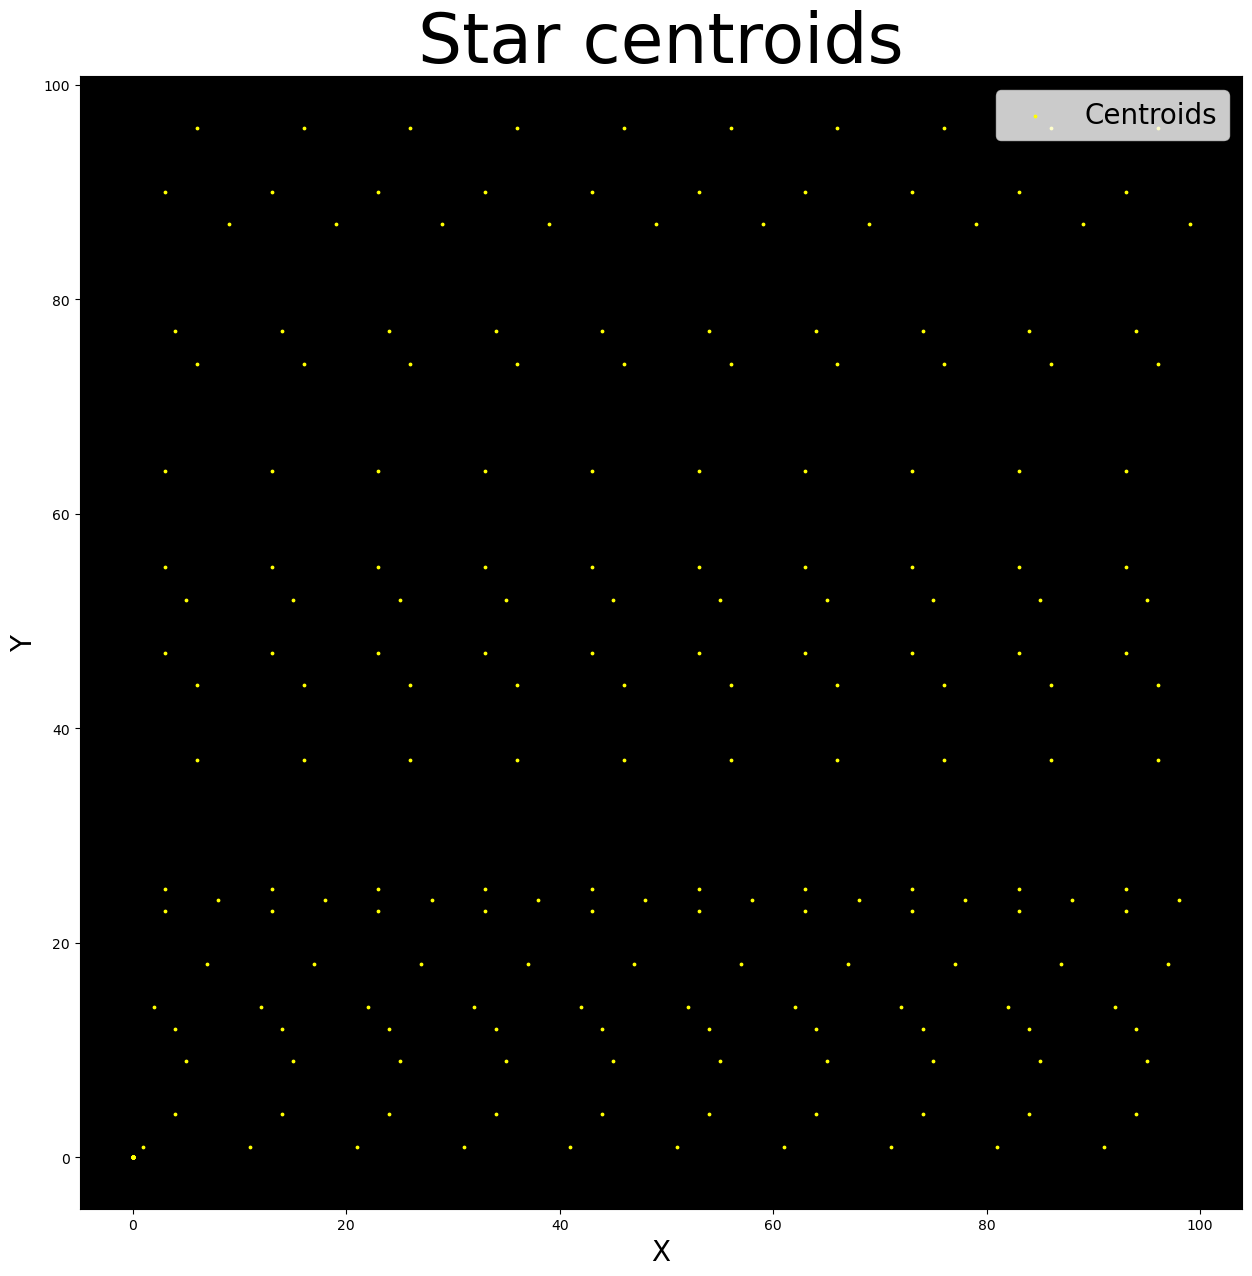

In [23]:
plt.figure(figsize=(15,15),dpi=100)
plot=plt.scatter(plot_x,plot_y,s=3,color="yellow")
plt.savefig('pic.png')
ax=plt.axes()
ax.set_facecolor("black")
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.legend(["Centroids"],fontsize=20)
plt.title("Star centroids",fontsize=50)
#Plots the centroids 